# Multivariate Stock Price Prediction - LSTM

## PHASE 1 : Exploratory Data Analysis

### LOADING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### LOADING THE DATASET

In [2]:
# Data file location and Loading the dataset
data_file_location = "..\\data\\raw\\"
data_file_name = "google_stock_price_full"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [3]:
#sample
data.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2096,2012-12-14,17.413979,17.629421,17.395548,17.483467,17.483467,85523366
1636,2011-02-16,15.582344,15.604012,15.494423,15.547225,15.547225,67612482
4480,2022-06-06,116.742500,119.398499,116.528297,117.010498,117.010498,23786000
3529,2018-08-24,60.441002,61.082500,60.317951,61.032501,61.032501,18932000
4557,2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900


In [4]:
# Shape of the dataset
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 4940
Number of columns: 7


In [5]:
# Data types

In [6]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### DATA CLEANING

In [7]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
# Check column format
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

### EXPLORE DATASET

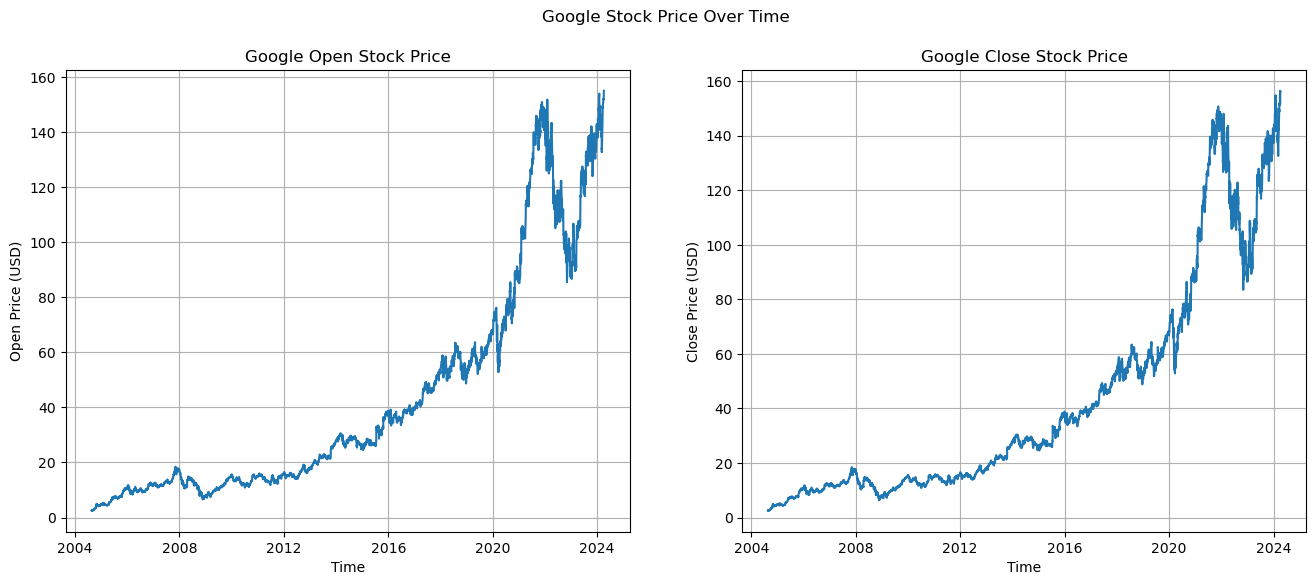

In [9]:
# Plot of Open and Close price for the whole period
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Google Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

The previous charts show an inconsistent behavior in the stock's performance over time, with a completely distinct trend during the past five years.

This means that the old historical data might not be relevant to the predictions, since it's most likely to represents a different period with outdated indicators that don't affect the current trend.

Accordingly, we will concentrate our analysis on the most recent five-year data, as it is expected to provide more accurate insights for predicting future trends.

In [10]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2019]

# Filtered data shape
data_5years.shape

(1323, 7)

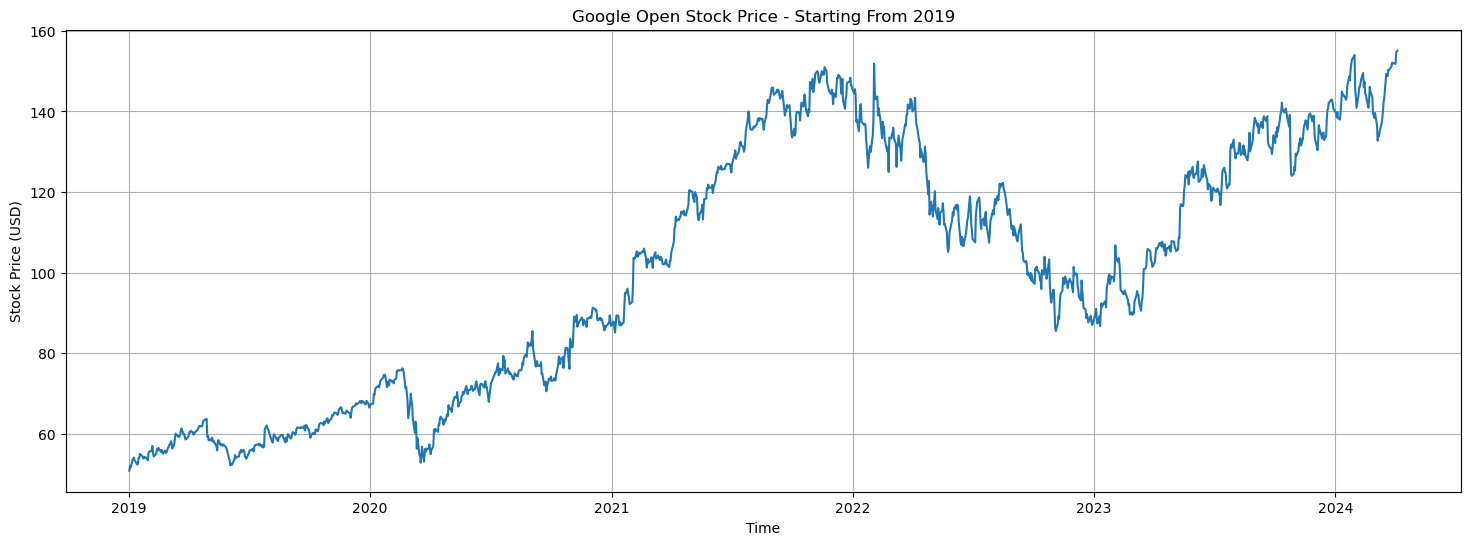

In [11]:
# Plot for Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()

### STORED THE FILTERED DATASET

In [12]:
# Preparing data file location
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent"
data_file_ext = "csv"

# Storing dataset
data_5years.to_csv(data_file_location + data_file_name + "." + data_file_ext, index=None)